c:\Users\KOVVO\anaconda3\envs\Timo\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KOVVO\anaconda3\envs\Timo\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KOVVO\anaconda3\envs\Timo\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00         4
        True       0.90      1.00      0.95        37

    accuracy                           0.90        41
   macro avg       0.45      0.50      0.47        41
weighted avg       0.81      0.90      0.86        41



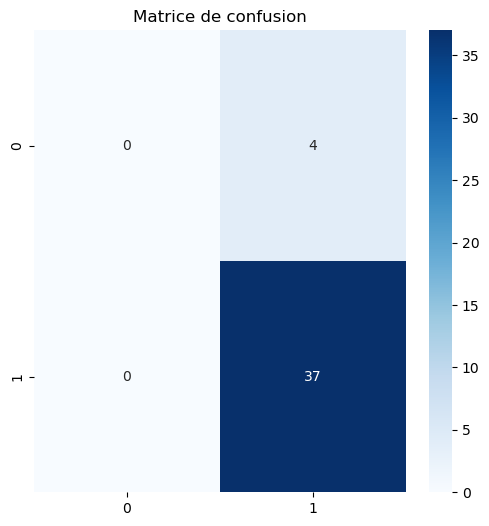

In [1]:
# predictive_analysis.ipynb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/spacex_cleaned.csv")

# Prepare data
X = df[["year", "rocket_name", "launchpad_name"]]
y = df["success"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), ["rocket_name", "launchpad_name"])],
    remainder="passthrough"
)
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.savefig("presentation/confusion_matrix.png")
plt.show()